In [65]:
# Load necessary libraries
library(survival)
library(MASS)

In [66]:
# install.packages('survival')
# installed.packages('survreg')
# install.packages('StepReg')


In [67]:
# library('StepReg')

In [68]:
# install.packages('cran/StepReg')

# devtools::install_github("JunhuiLi1017/StepReg")

In [69]:

# Load dataset
survival_data_adjusted <- read.csv("survival_data_adjusted.csv")

# Display first few rows to verify\head(survival_data_adjusted)

# Create survival object with entry time (left truncation)
surv_obj <- with(survival_data_adjusted, Surv(time = entry_time, 
                                              time2 = survival_time, 
                                              event = status))

In [70]:
head(survival_data_adjusted)

,company_name,survival_time,start_time,end_time,end_minus_start_time,live_count,status,X1,X2,X3,⋯,X10,X11,X12,X13,X14,X15,X16,X17,X18,entry_time
,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,C_1,19,1999,2017,19,19,0,511.267,833.107,18.373,⋯,740.998,180.447,70.658,191.226,163.816,201.026,1024.333,401.483,935.302,0
2,C_10,20,1999,2018,20,20,0,498.794,1459.008,385.568,⋯,6608.506,2206.052,578.777,964.345,495.490,668.284,2423.353,4402.773,1459.008,0
3,C_100,15,1999,2013,15,15,0,23.527,17.916,5.252,⋯,71.001,0.000,14.640,22.336,11.512,45.705,40.252,15.896,20.360,0
4,C_1000,20,1999,2018,20,20,0,1553.725,1908.784,137.696,⋯,4088.797,354.775,676.038,2083.213,1525.453,1839.085,3991.997,2397.304,3178.263,0
5,C_1001,20,1999,2018,20,20,0,7965.500,34240.100,171.700,⋯,10372.900,1439.600,136.500,2472.400,5121.800,1799.200,36712.500,6807.100,36404.300,0
6,C_1002,20,1999,2018,20,20,0,27.013,36.197,1.526,⋯,39.951,5.280,1.335,15.257,6.051,24.341,51.454,11.331,48.593,0


In [71]:
# Fit initial Cox model (full model with all predictors)
# Add the columns 'adjusted_entry_time', 'survival_time', and 'status' to the dataset
survival_data_adjusted <- survival_data_adjusted[, c(#"adjusted_entry_time", "survival_time", "status", 
                                                     names(survival_data_adjusted)[grepl("^X", names(survival_data_adjusted))])]

# Fit the Cox model
cox_min <- coxph(surv_obj ~ X3+X4, data = survival_data_adjusted)

In [86]:
library(ggplot2)
library(broom)

coef_df <- tidy(cox_min, conf.int = TRUE)

# Plot
gg_min = ggplot(coef_df, aes(x = term, y = estimate, ymin = conf.low, ymax = conf.high)) +
  geom_pointrange() +
  geom_hline(yintercept = 0, linetype = "dashed") +
  coord_flip() +
  labs(title = "Coefficient Estimates with 95% Confidence Intervals",
       x = "Covariates", y = "Log Hazard Ratio (coef)") +
  theme_minimal()
ggsave("fig/cox_model_with_only_x3_x4_coefficients.png", width = 8, height = 6)

In [73]:
# Fit the Cox model with a cross term (interaction term) between X3 and X4
cox_min <- coxph(surv_obj ~ X3 * X4, data = survival_data_adjusted)

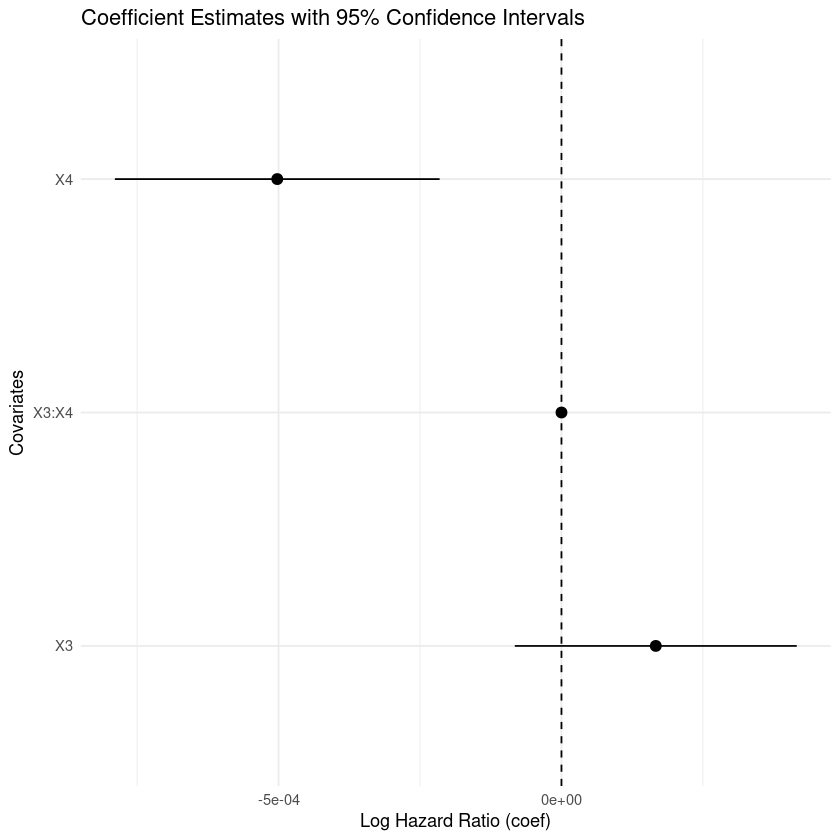

In [74]:
library(ggplot2)
library(broom)

coef_df <- tidy(cox_min, conf.int = TRUE)

# Plot
ggplot(coef_df, aes(x = term, y = estimate, ymin = conf.low, ymax = conf.high)) +
  geom_pointrange() +
  geom_hline(yintercept = 0, linetype = "dashed") +
  coord_flip() +
  labs(title = "Coefficient Estimates with 95% Confidence Intervals",
       x = "Covariates", y = "Log Hazard Ratio (coef)") +
  theme_minimal()

In [75]:
# Fit initial Cox model (full model with all predictors)
# Add the columns 'adjusted_entry_time', 'survival_time', and 'status' to the dataset
survival_data_adjusted <- survival_data_adjusted[, c(names(survival_data_adjusted)[grepl("^X", names(survival_data_adjusted))])]

# Fit the Cox model
cox_full <- coxph(surv_obj ~ ., data = survival_data_adjusted)



Warning message in agreg.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Ran out of iterations and did not converge”


In [76]:
ph_test <- cox.zph(cox_full)
print(ph_test)
# plot(ph_test)



          chisq df    p
X1      0.11727  1 0.73
X2      0.00123  1 0.97
X3      1.55012  1 0.21
X4      0.30430  1 0.58
X5      0.03736  1 0.85
X6      1.58496  1 0.21
X7      0.02997  1 0.86
X8      1.72137  1 0.19
X9      0.01447  1 0.90
X10     0.22788  1 0.63
X11     0.03130  1 0.86
X14     0.05366  1 0.82
X15     0.10251  1 0.75
X17     0.09560  1 0.76
GLOBAL 16.69201 14 0.27


In [77]:
library(ggplot2)
library(broom)

coef_df <- tidy(cox_full, conf.int = TRUE)

# Plot
g_full = ggplot(coef_df, aes(x = term, y = estimate, ymin = conf.low, ymax = conf.high)) +
  geom_pointrange() +
  geom_hline(yintercept = 0, linetype = "dashed") +
  coord_flip() +
  labs(title = "Coefficient Estimates with 95% Confidence Intervals",
       x = "Covariates", y = "Log Hazard Ratio (coef)") +
  theme_minimal()

ggsave( "fig/cox_model_with_all_coefficients.png", width = 8, height = 6)

Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_pointrange()`).”


In [78]:

# Perform stepwise feature selection using AIC
step_cox <- stepAIC(cox_full, direction = "both")

# Print selected features
selected_features <- names(coef(step_cox))
print(selected_features)


Start:  AIC=10038.56
surv_obj ~ X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + X10 + 
    X11 + X12 + X13 + X14 + X15 + X16 + X17 + X18



Warning message in agreg.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Ran out of iterations and did not converge”
Warning message in agreg.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Ran out of iterations and did not converge”
Warning message in agreg.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Ran out of iterations and did not converge”
Warning message in agreg.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Ran out of iterations and did not converge”
Warning message in agreg.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Ran out of iterations and did not converge”
Warning message in agreg.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Ran out of iterations and did not converge”
Warning message in agreg.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Ran out of iterations and did not converge”
Warning message in agreg.fit(X, Y, istrat, offset, init, control, weights = 


Step:  AIC=10038.56
surv_obj ~ X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + X10 + 
    X11 + X12 + X13 + X14 + X15 + X16 + X17



Warning message in agreg.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Ran out of iterations and did not converge”
Warning message in agreg.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Ran out of iterations and did not converge”
Warning message in agreg.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Ran out of iterations and did not converge”
Warning message in agreg.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Ran out of iterations and did not converge”
Warning message in agreg.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Ran out of iterations and did not converge”
Warning message in agreg.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Ran out of iterations and did not converge”
Warning message in agreg.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Ran out of iterations and did not converge”
Warning message in agreg.fit(X, Y, istrat, offset, init, control, weights = 


Step:  AIC=10038.67
surv_obj ~ X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + X10 + 
    X11 + X12 + X13 + X14 + X15 + X16

 [1] "X1"  "X2"  "X3"  "X4"  "X5"  "X6"  "X7"  "X8"  "X9"  "X10" "X11" "X12"
[13] "X13" "X14" "X15" "X16"


In [79]:
# Perform stepwise feature selection using AIC
step_cox <- stepAIC(cox_full, direction = "backward")

# Print selected features
selected_features <- names(coef(step_cox))
print(selected_features)


Start:  AIC=10038.56
surv_obj ~ X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + X10 + 
    X11 + X12 + X13 + X14 + X15 + X16 + X17 + X18



Warning message in agreg.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Ran out of iterations and did not converge”
Warning message in agreg.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Ran out of iterations and did not converge”
Warning message in agreg.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Ran out of iterations and did not converge”
Warning message in agreg.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Ran out of iterations and did not converge”
Warning message in agreg.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Ran out of iterations and did not converge”
Warning message in agreg.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Ran out of iterations and did not converge”
Warning message in agreg.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Ran out of iterations and did not converge”
Warning message in agreg.fit(X, Y, istrat, offset, init, control, weights = 


Step:  AIC=10038.56
surv_obj ~ X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + X10 + 
    X11 + X12 + X13 + X14 + X15 + X16 + X17



Warning message in agreg.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Ran out of iterations and did not converge”
Warning message in agreg.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Ran out of iterations and did not converge”
Warning message in agreg.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Ran out of iterations and did not converge”
Warning message in agreg.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Ran out of iterations and did not converge”
Warning message in agreg.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Ran out of iterations and did not converge”
Warning message in agreg.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Ran out of iterations and did not converge”
Warning message in agreg.fit(X, Y, istrat, offset, init, control, weights = weights, :
“Ran out of iterations and did not converge”
Warning message in agreg.fit(X, Y, istrat, offset, init, control, weights = 


Step:  AIC=10038.67
surv_obj ~ X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + X10 + 
    X11 + X12 + X13 + X14 + X15 + X16

 [1] "X1"  "X2"  "X3"  "X4"  "X5"  "X6"  "X7"  "X8"  "X9"  "X10" "X11" "X12"
[13] "X13" "X14" "X15" "X16"


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_pointrange()`).”


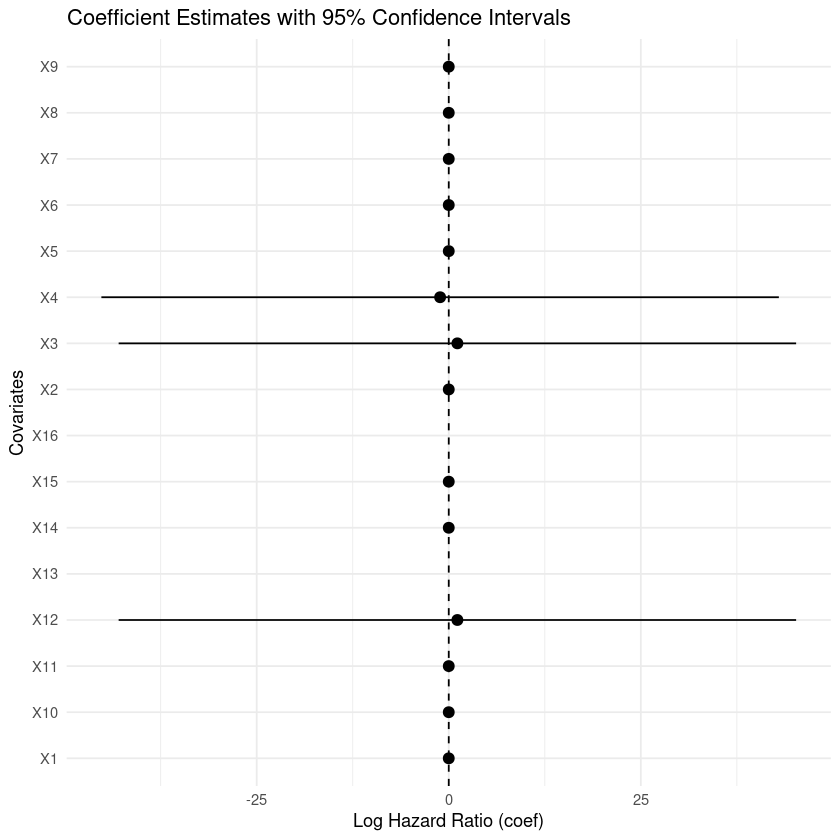

In [80]:
library(ggplot2)
library(broom)

coef_df <- tidy(step_cox, conf.int = TRUE)

# Plot
ggplot(coef_df, aes(x = term, y = estimate, ymin = conf.low, ymax = conf.high)) +
  geom_pointrange() +
  geom_hline(yintercept = 0, linetype = "dashed") +
  coord_flip() +
  labs(title = "Coefficient Estimates with 95% Confidence Intervals",
       x = "Covariates", y = "Log Hazard Ratio (coef)") +
  theme_minimal()

In [81]:
# Perform stepwise feature selection using AIC
step_cox <- stepAIC(cox_full, direction = "forward")

# Print selected features
selected_features <- names(coef(step_cox))
print(selected_features)


Start:  AIC=10038.56
surv_obj ~ X1 + X2 + X3 + X4 + X5 + X6 + X7 + X8 + X9 + X10 + 
    X11 + X12 + X13 + X14 + X15 + X16 + X17 + X18

 [1] "X1"  "X2"  "X3"  "X4"  "X5"  "X6"  "X7"  "X8"  "X9"  "X10" "X11" "X12"
[13] "X13" "X14" "X15" "X16" "X17" "X18"


In [82]:
selected_features

[1] "X1"  "X2"  "X3"  "X4"  "X5"  "X6"  "X7"  "X8"  "X9"  "X10" "X11" "X12"
[13] "X13" "X14" "X15" "X16" "X17" "X18"

code to select features exhausively, or randomly is separately running in `search_factors.r` and `exhausive.r`

In [83]:
# # Load necessary library
# library(survival)
# library(compiler)
# compiler::enableJIT(3)
# # Assuming 'survival_data_adjusted' is your dataset and 'surv_obj' is your Surv object
# # Extract predictor variable names (e.g., those starting with "X")
# predictor_names <- grep("^X", names(survival_data_adjusted), value = TRUE)


# N <- 2^12

# set.seed(123)  # For reproducibility

# # Initialize a data frame to store results
# results <- data.frame(
#   combination = character(N),
#   formula = character(N),
#   AIC = numeric(N),
#   stringsAsFactors = FALSE
# )

# # Generate and evaluate random combinations
# for (i in 1:N) {
#   # Generate a random binary vector of length equal to the number of predictors
#   binary_vector <- rbinom(length(predictor_names), 1, 0.5)
  
#   # Identify selected predictors
#   selected_vars <- predictor_names[which(binary_vector == 1)]
  
#   # Skip if no predictors are selected
#   if (length(selected_vars) == 0) {
#     results$combination[i] <- paste(rep(0, length(predictor_names)), collapse = "")
#     results$formula[i] <- "surv_obj ~ 1"
#     results$AIC[i] <- NA
#     next
#   }
  
#   # Construct the formula
#   formula_str <- paste("surv_obj ~", paste(selected_vars, collapse = " + "))
#   formula_obj <- as.formula(formula_str)
  
#   # Fit the Cox model and compute AIC
#   model <- tryCatch(
#     coxph(formula_obj, data = survival_data_adjusted),
#     error = function(e) NULL
#   )
  
#   if (!is.null(model)) {
#     aic_value <- extractAIC(model)[2]
#   } else {
#     aic_value <- NA
#   }
  
#   # Store the results
#   results$combination[i] <- paste(binary_vector, collapse = "")
#   results$formula[i] <- formula_str
#   results$AIC[i] <- aic_value
# }

# # Remove rows with NA AIC values
# results_clean <- na.omit(results)

# # Sort the results by AIC in ascending order
# results_sorted <- results_clean[order(results_clean$AIC), ]

# # Display the top 5 combinations
# top_5 <- head(results_sorted, 5)
# print(top_5)


In [ ]:

# Load data
data <- read.csv("top_5_cox_models_with_interactions.csv", stringsAsFactors = FALSE)

# Create an empty list to store formulas
formulas <- vector("list", length = nrow(data))

# Loop through rows to convert strings into formulas
for (i in 1:nrow(data)) {
  formulas[[i]] <- as.formula(data$formula[i])
}

# Optionally, name formulas for convenience
names(formulas) <- paste0("formula", 1:nrow(data))

# Check your formulas
formulas




$formula1
surv_obj ~ X1 + X8 + X11 + X12 + X18

$formula2
surv_obj ~ X1 + X8 + X9 + X11 + X12

$formula3
surv_obj ~ X1 + X8 + X9 + X11 + X12 + X16

$formula4
surv_obj ~ X1 + X8 + X11 + X12 + X16

$formula5
surv_obj ~ X1 + X2 + X8 + X11 + X12 + X18


Call:
coxph(formula = formulas[[1]], data = survival_data_adjusted)

  n= 8971, number of events= 609 

          coef  exp(coef)   se(coef)      z Pr(>|z|)    
X1  -2.691e-04  9.997e-01  1.060e-04 -2.538 0.011148 *  
X8  -3.017e-05  1.000e+00  2.048e-05 -1.473 0.140704    
X11  1.700e-04  1.000e+00  4.935e-05  3.444 0.000573 ***
X12 -5.744e-04  9.994e-01  1.492e-04 -3.850 0.000118 ***
X18  5.200e-05  1.000e+00  1.975e-05  2.633 0.008454 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

    exp(coef) exp(-coef) lower .95 upper .95
X1     0.9997     1.0003    0.9995    0.9999
X8     1.0000     1.0000    0.9999    1.0000
X11    1.0002     0.9998    1.0001    1.0003
X12    0.9994     1.0006    0.9991    0.9997
X18    1.0001     0.9999    1.0000    1.0001

Concordance= 0.608  (se = 0.011 )
Likelihood ratio test= 40.72  on 5 df,   p=1e-07
Wald test            = 28.73  on 5 df,   p=3e-05
Score (logrank) test = 15.2  on 5 df,   p=0.01


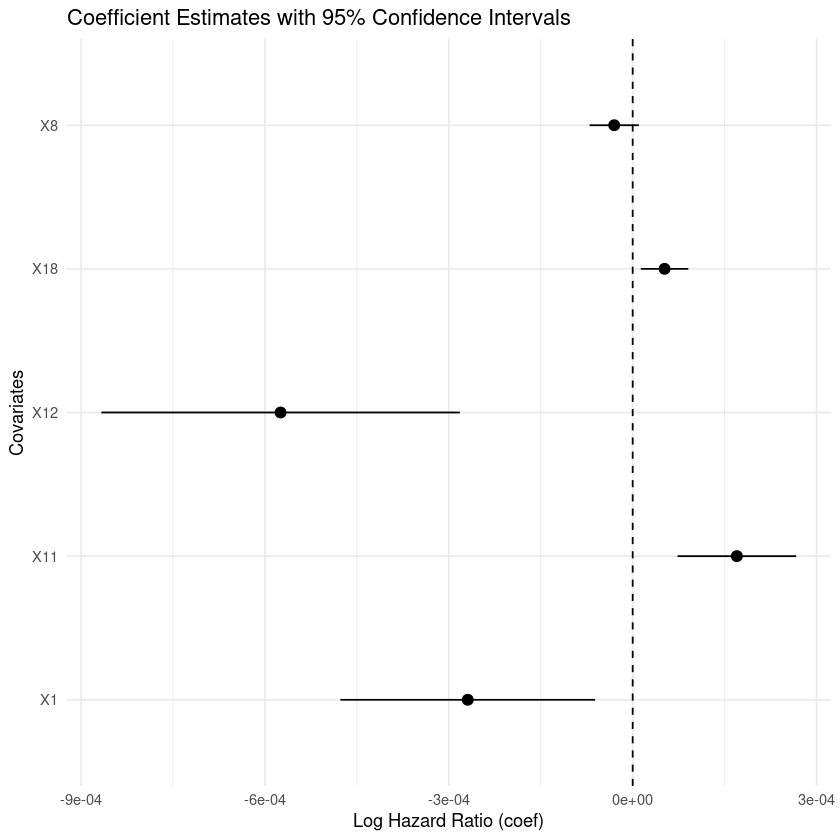

In [85]:

# Using your previously created formulas list
cox_model1 <- coxph(formulas[[1]], data = survival_data_adjusted)

# Summarize the model
summary(cox_model1)
coef_df <- tidy(cox_model1, conf.int = TRUE)

# Plot
ggplot(coef_df, aes(x = term, y = estimate, ymin = conf.low, ymax = conf.high)) +
  geom_pointrange() +
  geom_hline(yintercept = 0, linetype = "dashed") +
  coord_flip() +
  labs(title = "Coefficient Estimates with 95% Confidence Intervals",
       x = "Covariates", y = "Log Hazard Ratio (coef)") +
  theme_minimal()
ggsave("fig/cox_model_selected_from_exhaustive_AIC_coefficients.png", width = 8, height = 6)